In [24]:
import pandas as pd
data = pd.read_csv('https://www.dropbox.com/s/sgyhxd859iw4xx0/prepared_sentences.csv?dl=1')
data.head()

,Unnamed: 0,doi,title,label,text,pub_year,pub_month,n_authors,n_references,n_sections,n_sentences,n_citation_sentence,reference_seq,section_seq,paragraph_seq,sentence_seq,citation_characer_seq,n_citations_in_sentence,sentence_character_seq,labels
0,1,10.1016/j.joi.2006.05.001,The influence of missing publications on the H...,"Bar-Ilan, 2006; Egghe, in press; Glänzel, 2006...","Recently the Hirsch index, in short: h-index, ...",2007,24085,1,13,7,74,22,1,1,1,1,109,4,1,"Bar-Ilan, 2006; Egghe, in press; Glänzel, 2006..."
1,2,10.1016/j.joi.2006.05.001,The influence of missing publications on the H...,Hirsch (2005),"This index, introduced by <CITATION> is calcul...",2007,24085,1,13,7,74,22,10,1,1,2,196,1,170,Hirsch (2005)
2,3,10.1016/j.joi.2006.05.001,The influence of missing publications on the H...,"Braun et al., 2005","Clearly, this definition can also be applied t...",2007,24085,1,13,7,74,22,2,1,1,5,653,3,525,"Braun et al., 2005||Egghe & Rousseau, 2006||Ro..."
3,4,10.1016/j.joi.2006.05.001,The influence of missing publications on the H...,"Bar-Ilan, 2006","Yet, it is also possible to collect citations ...",2007,24085,1,13,7,74,22,1,1,2,7,973,1,894,"Bar-Ilan, 2006"
4,5,10.1016/j.joi.2006.05.001,The influence of missing publications on the H...,"Rousseau, 2005",Expressed in a conglomerate framework this mea...,2007,24085,1,13,7,74,22,12,1,2,8,1160,1,1078,"Rousseau, 2005"


In this notebook, I'm mostly following a doc2vec tutorial that can be found at the following link,

https://medium.com/@mishra.thedeepak/doc2vec-simple-implementation-example-df2afbbfbad5

I am using my own data, but following the general outline of the above

In [25]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import gensim.utils as gs_utils
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_multiple_whitespaces

# This will define the filters we want to use to pre-process the data
CUSTOM_FILTERS = [lambda x: x.lower(),  strip_punctuation, strip_multiple_whitespaces]

# Select a small sample of sentences, in this case, 5
sentences = []
for line in data["text"]:
    sentences.append(preprocess_string(line, CUSTOM_FILTERS))

print(sentences)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [26]:
print(len(sentences))

20407


In [27]:
tagged_data = [TaggedDocument(words=_d, tags=[str(i)]) for i, _d in enumerate(sentences)]

In [28]:
print(len(tagged_data))

20407


In [67]:
max_epochs = 10
vec_size = 50
alpha = 0.025

model = Doc2Vec(size=vec_size,
                alpha=alpha, 
                min_alpha=0.00025,
                min_count=1,
                dm =1)
  
model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("d2v.model")
print("Model Saved")

/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


iteration 0


/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).


iteration 1
iteration 2
iteration 3
iteration 4
iteration 5
iteration 6
iteration 7
iteration 8
iteration 9
Model Saved


In [61]:
from gensim.models.doc2vec import Doc2Vec

model= Doc2Vec.load("d2v.model")

# If given a new word vector, i.e. a new document, we can infer its vector-space using the following commans
test_data = word_tokenize("citation index".lower())
v1 = model.infer_vector(test_data)
#print("V1_infer", v1)


# We can also find the "most similar" documents using thie following command,
similar_doc = model.docvecs.most_similar('1')
print(similar_doc)

# to find vector of doc in training data using tags or in other words, printing the vector of document at index 1 in training data
print(model.docvecs['1'])

[('9828', 0.916047215461731), ('13822', 0.8875530958175659), ('12876', 0.8874228000640869), ('16748', 0.8850558996200562), ('9097', 0.8822667598724365), ('3266', 0.8806637525558472), ('12953', 0.8791130185127258), ('3271', 0.8691480755805969), ('2427', 0.8683838844299316), ('6731', 0.8671138286590576)]
[-0.36313322 -0.08293211  1.0625156  -0.6159375   0.35406438 -0.15898035
  0.68275875 -0.7193167  -0.15300742 -1.0538623   0.53177017 -0.15196647
  0.24060102 -0.7550295   0.953906   -0.65573263  0.51427597  1.5419612
 -0.7052686  -0.5425635 ]


/Users/dakotamurray/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [62]:
features = []
for index in range(0, len(model.docvecs)):
    features.append(list(model.docvecs[index]))
    
print(len(features))

20407


In [32]:
features

[[-0.18899101,
  -0.17226359,
  1.0924283,
  -0.74283034,
  -0.564149,
  0.2784118,
  -0.2619418,
  -0.098820634,
  -0.15772907,
  -0.87646174,
  -0.5822748,
  0.19503339,
  0.29145083,
  -1.115006,
  1.4958898,
  -0.82898706,
  -0.1173484,
  0.6319322,
  0.22602986,
  -0.8893899,
  0.058833294,
  -0.62590665,
  1.062806,
  -0.972709,
  0.30018362,
  0.38063595,
  0.031040587,
  -0.2975817,
  -0.054080214,
  -0.70239234,
  -0.78003645,
  0.8100641,
  0.29199398,
  -1.0752202,
  -0.57539254,
  0.88884956,
  -0.7187892,
  0.48484245,
  -0.35176364,
  0.07339466,
  -0.021977592,
  0.7933579,
  1.0836349,
  0.16106845,
  -0.0901342,
  0.21393761,
  0.07732104,
  -0.7892162,
  -1.3813255,
  0.42646083],
 [-0.52346665,
  -0.2563749,
  0.10161062,
  -0.17909102,
  0.047759753,
  0.29721987,
  0.20147897,
  -0.7724013,
  -0.24809887,
  -0.21756645,
  0.30431685,
  0.16130045,
  0.6451306,
  -0.5658461,
  0.9267351,
  -0.5675722,
  0.26066464,
  0.46395385,
  -0.09877357,
  -0.41446996,
  0.202

In [69]:
df = pd.DataFrame(features)
df["doi"] = data["doi"]
df["sentence_progression"] = data["sentence_seq"] / data["n_sentences"]
df["n_citations"] = data["n_citations_in_sentence"]
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,doi,sentence_progression,n_citations
0,-0.097731,0.194136,0.752742,-0.594279,-0.111833,-0.158036,-0.204687,-0.505212,-0.448588,-0.495122,...,-0.919965,0.801576,-1.539977,0.451597,0.744387,0.714155,-0.734030,10.1016/j.joi.2006.05.001,0.013514,4
1,-0.363133,-0.082932,1.062516,-0.615937,0.354064,-0.158980,0.682759,-0.719317,-0.153007,-1.053862,...,-0.755029,0.953906,-0.655733,0.514276,1.541961,-0.705269,-0.542563,10.1016/j.joi.2006.05.001,0.027027,1
2,-0.071754,0.079967,0.392503,0.194540,0.771290,-0.131904,-0.896852,0.039842,-0.868187,-0.245818,...,-1.145724,1.918500,-0.677156,-0.310992,-0.231054,1.270583,-0.048123,10.1016/j.joi.2006.05.001,0.067568,3
3,0.597712,0.405253,1.585600,1.045853,-0.291638,1.036927,-1.220176,1.362222,-0.521996,-0.525330,...,0.348563,0.711225,-0.175836,1.247264,0.643545,0.426524,-0.732456,10.1016/j.joi.2006.05.001,0.094595,1
4,0.322083,0.217408,0.319144,-0.145682,0.700351,0.299184,-0.559475,-0.595013,0.136283,-1.027425,...,-0.048758,0.777987,0.147340,0.339132,1.686382,-0.628362,-0.128984,10.1016/j.joi.2006.05.001,0.108108,1


Now I will try to use tSNE. It is generally a very good algortihm for nonlinear embedding, that behaves somehwer in between PCA (which preserves global distances) and Isomap (which only preserves local distance). 

I sample n=1000 documents to cluster, because tSNE scales pretty slowly for large datasets, and so its best to limit it. 

In [72]:
from sklearn.manifold import TSNE

# This runs pretty slow, so I will sample a smaller set of objects,
sample = df.sample(1000)
tsne_results = TSNE(n_components=2, perplexity = 10, early_exaggeration = 10, verbose = 1).fit_transform(sample.iloc[:, 0:50])
tsne_results.shape

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.832948
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.556404
[t-SNE] Error after 1000 iterations: 2.565547


(1000, 2)

Unfortuantely, the result of applying tSNE to the doc2vec vectors is not very good, and does not produce a convincing structure, it just seems like random noise. 

This may ultimately be an issue of small sentence size—our documents (citation sentences) are small and thus sparse. Doc2vec may not be the best representation. However, I would not give up here—doc2vec and word2vec will generally perform better the more data we throw at it, so we should try with broader and mroe diverse data soruces. 

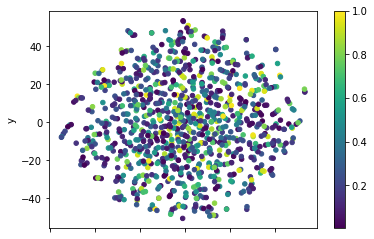

In [73]:
import matplotlib.pylab as plt
tsne_df = pd.DataFrame(tsne_results)
tsne_df.columns = ["x", "y"]
tsne_df.plot.scatter(x = "x", y = "y", c = sample["sentence_progression"], colormap = "viridis")

plt.show()